# 🏠 California House Price Prediction using Random Forest

This notebook demonstrates a complete end-to-end **Machine Learning workflow** using the **California Housing dataset** from `sklearn`.

We will:
- Fetch and save the dataset 📦  
- Preprocess and scale the data ⚙️  
- Train a **Random Forest Regressor** 🌲  
- Evaluate model accuracy 📊  
- Visualize actual vs predicted values 🎨  
- Save the trained model as a `.pkl` file 💾  


# Import libraries and timestamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from datetime import datetime
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Notebook last run at:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


Notebook last run at: 2025-11-04 01:19:01


# Load and save dataset

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

print("Dataset shape:", X.shape)
print("Feature names:", list(data.feature_names))

os.makedirs("data_folder", exist_ok=True)
dataset_path = os.path.join("data_folder", "california_dataset.csv")
pd.concat([X, y], axis=1).to_csv(dataset_path, index=False)
print(f"Dataset saved at: {dataset_path}")


Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset saved at: data_folder\california_dataset.csv


# Train test split and scaling

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Random forest model training

In [4]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("Random forest model training completed.")


Random forest model training completed.


# Predictions and evaluation

In [5]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error: 0.330
Mean Squared Error: 0.254
Root Mean Squared Error: 0.504
R² Score: 0.807


# Visualize actual vs predicted

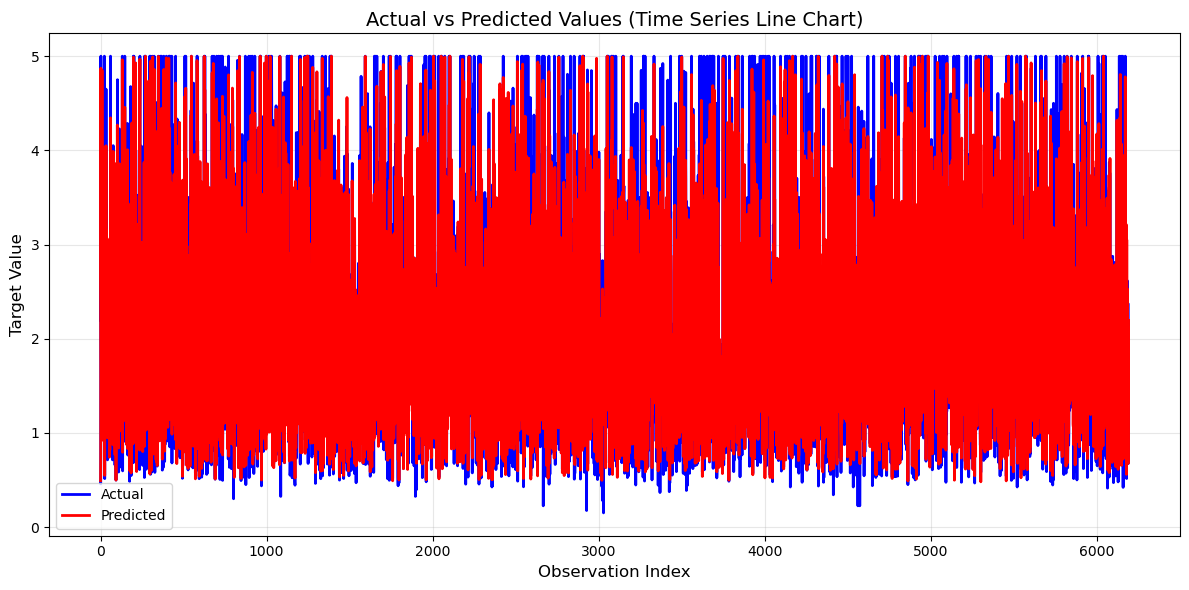

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, color='blue', label='Actual', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Values (Time Series Line Chart)', fontsize=14)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Saving Model

In [28]:
model_filename = "house_price_model.pkl"
with open(model_filename, 'wb') as file:
	pickle.dump(model, file)

In [2]:
!streamlit run app.py

^C


UsageError: Line magic function `%` not found.
